# Sensor on leg
Purpose of this experiment is to survey a motion of the skateboard during a skateboard trick called **Ollie**. I measure two physical quantities: gyroscope speed [rad/s] and acceleration [m/s^2]. Each quantity is represented by its x,y,z component. A smartphone and its app Phyphox works as a sensor estimating and calculating the movement and provides data to xls files. The smartphone was stuck on my leg. I made ten attempts.

The script that is processing data is written in Python. I use popular libraries such as: Pandas, NumPy, and Matplolib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Experiment consists of 10 measurements. 

In [2]:
video_time = {
    "Exp1" : "0.19",
    "Exp2" : "1.20",
    "Exp3" : "2:20",
    "Exp4(5)" : "3:07",
    "Exp5" : "4:20",
    "Exp6(7)" : "5:35",
    "Exp7(8)" : "6:30",
    "Exp8(9)" : "7:15",
    "Exp9(10)" : "7:55",
    "Exp10(11)" : "8:35 "
}

URL_keys_leg = {
    "Exp2" : '1u2JN_yVS9I-aDDk-xtRFLs9SDdrUNo0f',
    "Exp3" : '1qolBHxLSiGi-bmDUZ-V0WzaCay7UaA3x',
    "Exp4(5)" : '1eEh3oZpFoCo4dGdcVoGH6kuwIe7QY6rr',
    "Exp5" : '1P3E_T65CdJncewSVA-3H8hveejoqcdy4',
    "Exp6(7)" : '1kFniM6vHQVy659t0I4R86xH6bfGgo97K',
    "Exp7(8)" : '19j6veOIvJoe3aln1MURMChglvMA2F5AS',
    "Exp8(9)" : '1akmRWg8bhkKlAQV0XimEPTzsa7_UvazU',
    "Exp9(10)" : '1llYUn_deIMOUQl14-aJL9Gw5BqT3nH53',
    "Exp10(11)" : '1hdnEeKw7eb2bEvJLbtd12irF3N5qIFmc'
}

Each attempt takes 20 seconds, but only 2-3 seconds are vital. Following "ranges" focus on the most critical data for further analysis.

In [3]:
ranges = {
    "Exp2" : [500,900],
    "Exp3" : [600,1000],
    "Exp4(5)" : [600,1000],
    "Exp5" : [600,1000],
    "Exp6(7)" : [600,1000],
    "Exp7(8)" : [550,950],
    "Exp8(9)" : [700,1100],
    "Exp9(10)" : [1250,1750],
    "Exp10(11)" : [700,1100]
}

This script downloads data from Google Sheets, converts headers and plots data into the graphs. Each attempt has two graphs: Gyroscope and Accelerometer. 

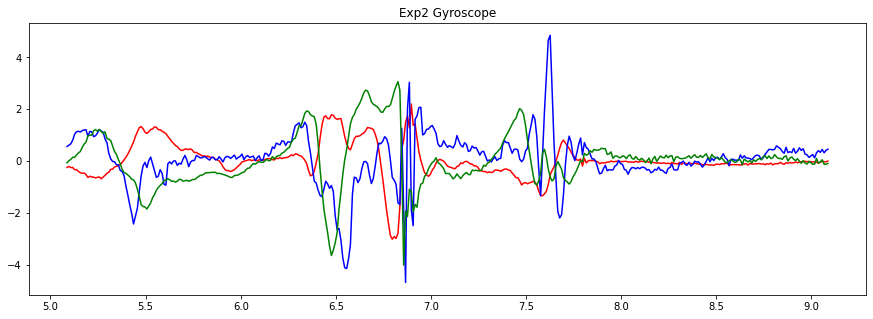

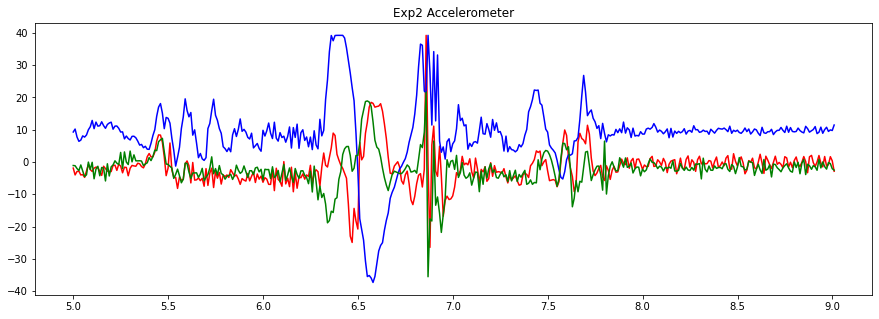

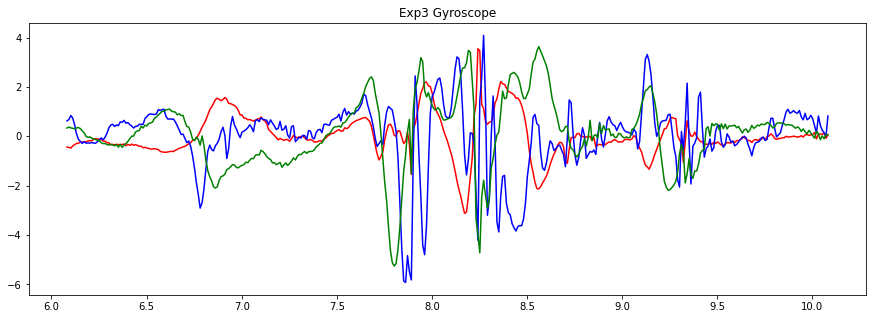

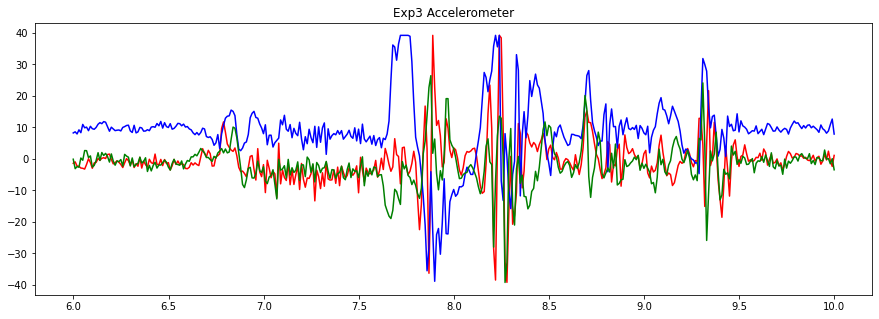

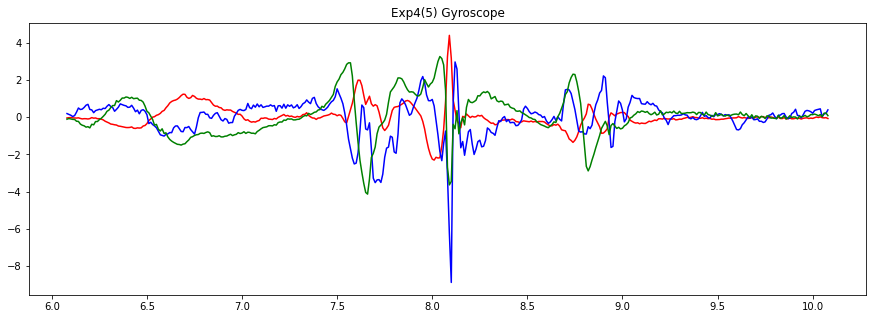

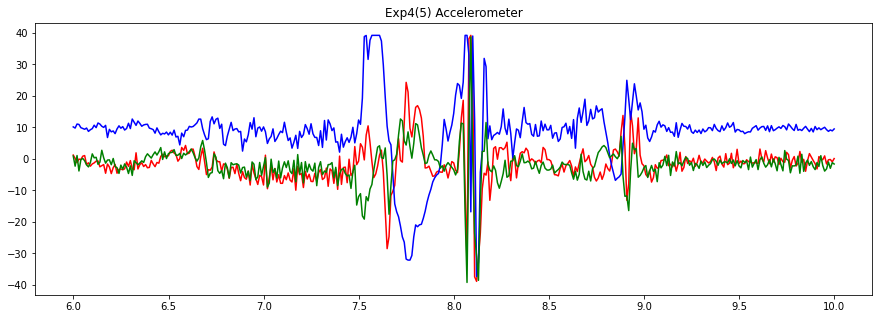

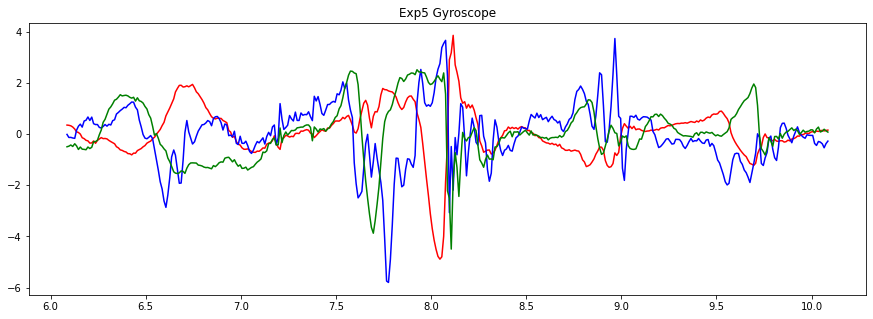

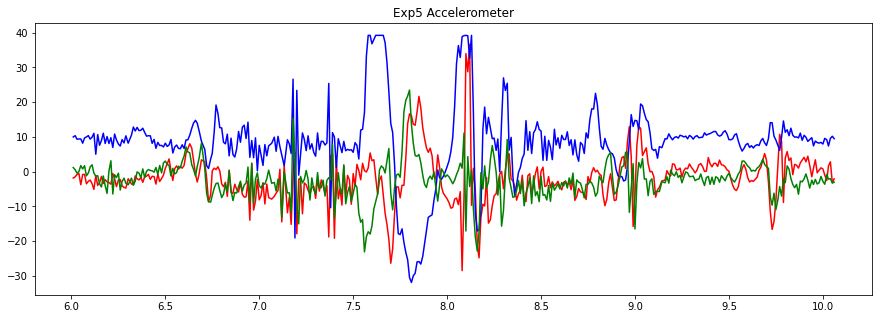

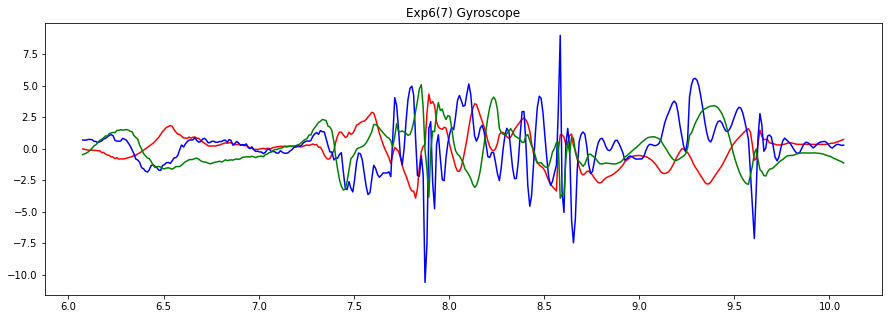

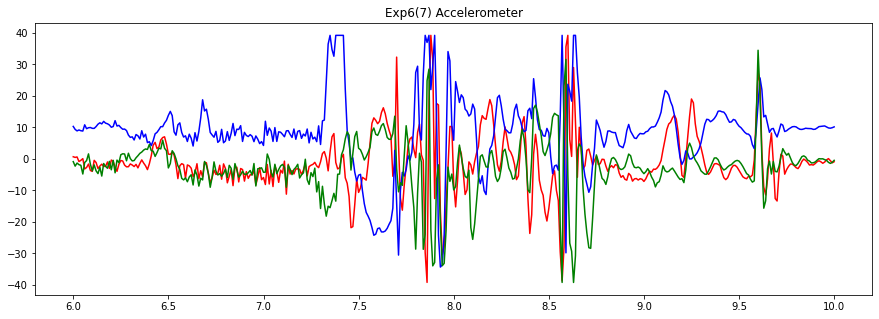

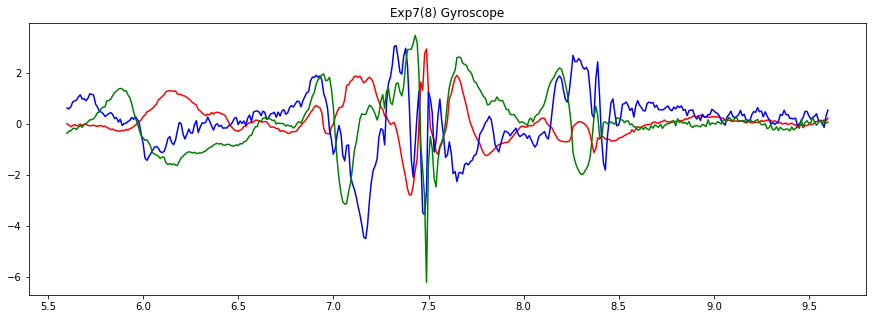

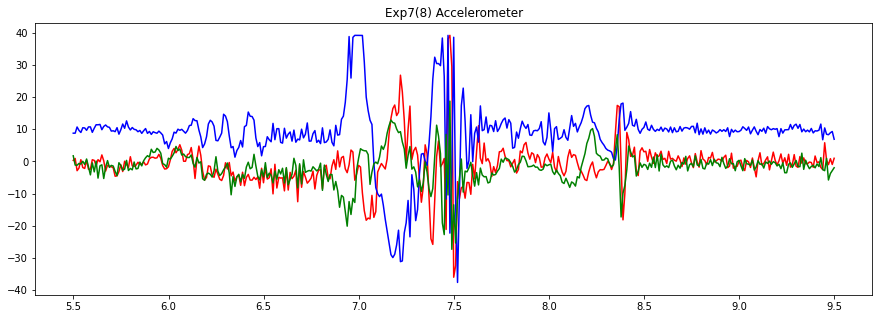

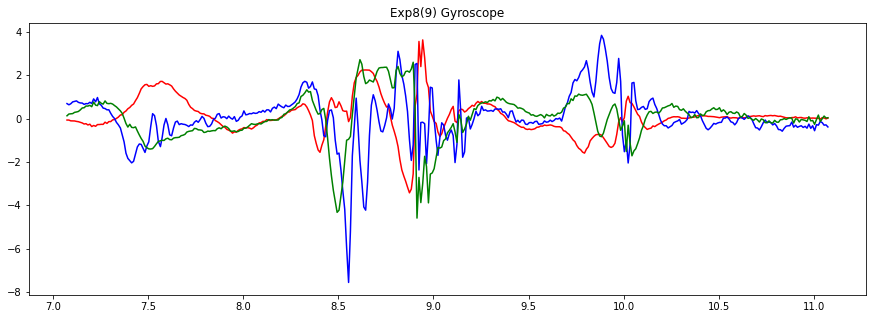

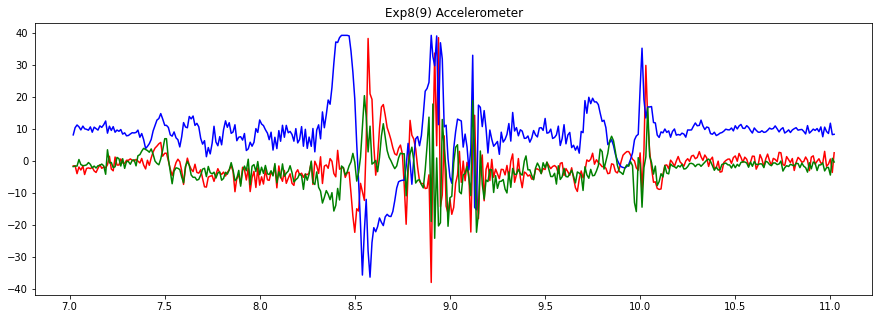

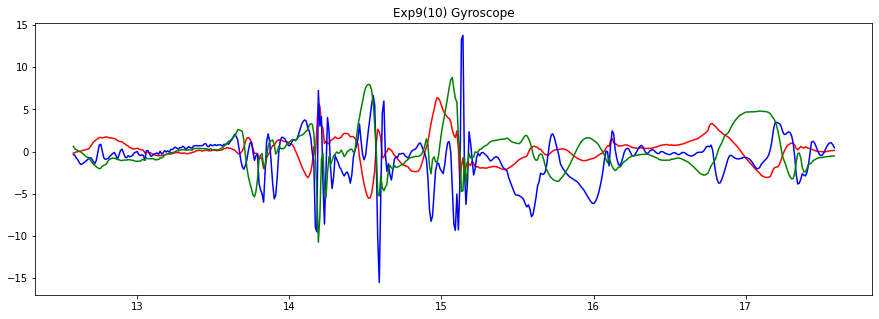

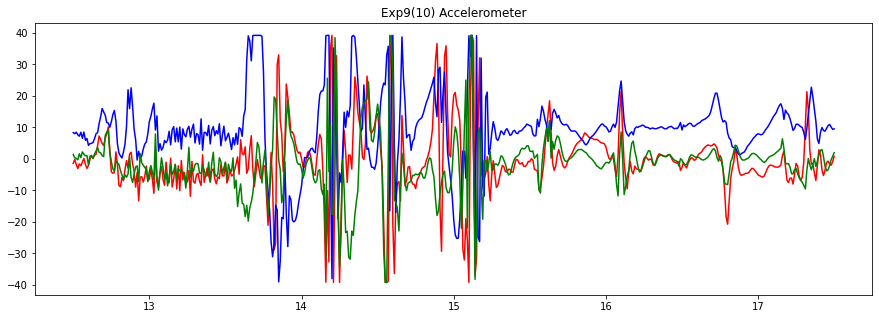

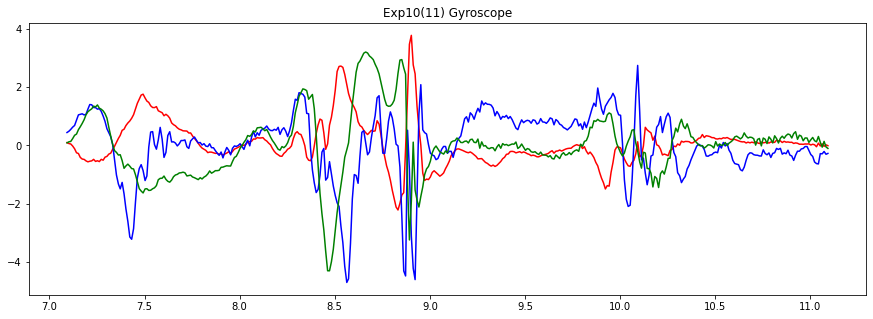

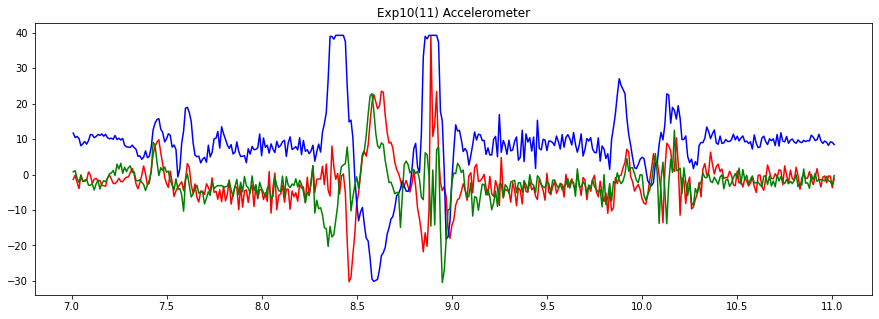

In [4]:
for i in URL_keys_leg:
    google_sheet_ID=URL_keys_leg[i]
    worksheet_name='Gyroscope'
    path='https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
        google_sheet_ID,
        worksheet_name
    )
    
    data_gyr = pd.read_csv(path)
    
    data_gyr.columns = [c.replace(' ', '_') for c in data_gyr.columns]
    data_gyr.columns = [c.replace('_(rad/s)', '') for c in data_gyr.columns]
    data_gyr.columns = [c.replace('_(s)', '') for c in data_gyr.columns]
    
    
    google_sheet_ID=URL_keys_leg[i]
    worksheet_name='Accelerometer'
    path='https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
        google_sheet_ID,
        worksheet_name
    )
    
    data_acc = pd.read_csv(path)
    
    data_acc.columns = [c.replace(' ', '_') for c in data_acc.columns]
    data_acc.columns = [c.replace('_(m/s^2)', '') for c in data_acc.columns]
    data_acc.columns = [c.replace('_(s)', '') for c in data_acc.columns]
    
    
    a,b=ranges[i]
    
    graphdata_gyr=data_gyr.loc[a:b,:]
    graphdata_acc=data_acc.loc[a:b,:]
    
    title=i+" Gyroscope"      
    plt.figure(figsize=(15,5))
    plt.title(title)
    plt.plot(graphdata_gyr.Time, graphdata_gyr.Gyroscope_x, color="red")
    plt.plot(graphdata_gyr.Time, graphdata_gyr.Gyroscope_y, color="blue")
    plt.plot(graphdata_gyr.Time, graphdata_gyr.Gyroscope_z, color="green")

    title=i+" Accelerometer"      
    plt.figure(figsize=(15,5))
    plt.title(title)
    plt.plot(graphdata_acc.Time, graphdata_acc.Acceleration_x, color="red")
    plt.plot(graphdata_acc.Time, graphdata_acc.Acceleration_y, color="blue")
    plt.plot(graphdata_acc.Time, graphdata_acc.Acceleration_z, color="green")
    
    plt.show()